In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%load_ext autoreload
%autoreload 2

In [2]:
def read_csv_file(file_path):
    try:
        return pd.read_csv(file_path, delimiter=";", encoding="utf-8", low_memory=False)
    except pd.errors.ParserError:
        print(f"Error parsing {file_path}")
        return pd.DataFrame()


def read_csv_file_with_filename(file_path):
    try:
        df = pd.read_csv(file_path, delimiter=";", encoding="utf-8", low_memory=False)
        df["csv"] = os.path.basename(file_path)
    except pd.errors.ParserError:
        print(f"Error parsing {file_path}")
        return pd.DataFrame()
    return df

In [3]:
data_path = f"{os.getcwd()}/data/data_expression"
all_files = [
    os.path.join(data_path, file)
    for file in os.listdir(data_path)
    if file.endswith(".csv")
]

df_list = [read_csv_file_with_filename(file) for file in all_files]
expression_df = pd.concat(df_list, ignore_index=True)
expression_df.reset_index(drop=True, inplace=True)

In [4]:
def clean_column_name(col_name):
    """
    clean and format column name by replacing spaces and special characters with underscores and converting to lowercase.

    Parameters:
    col_name (str): The original column name.

    Returns:
    str: The cleaned and formatted column name.
    """
    col_name = col_name.replace("_", " ")
    col_name = col_name.replace("-", " ")
    col_name = re.sub(r"[^\w\s]", " ", col_name)
    col_name = re.sub(r"\s+", " ", col_name)
    # Replace non-word characters (except for spaces) with nothing
    col_name = re.sub(r"[^\w\s]", "", col_name)
    # Replace spaces with underscores
    col_name = col_name.replace(" ", "_")
    # Convert to lowercase
    cleaned_name = col_name.lower()
    return cleaned_name


def rename_columns(df):
    """
    Rename all columns of the DataFrame to a more convenient format.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns are to be renamed.

    Returns:
    pd.DataFrame: DataFrame with renamed columns.
    """
    # Create a dictionary to map old column names to new column names
    new_columns = {col: clean_column_name(col) for col in df.columns}

    # Rename columns in the DataFrame
    df.rename(columns=new_columns, inplace=True)

    return df


# Rename all columns to a more convenient format
expression_df = rename_columns(expression_df)

In [5]:
tpm_columns = [col for col in expression_df.columns if "tpm" in col]
expression_df = expression_df[['species', 'csv', 'chromosome', 'region'] + tpm_columns]

In [6]:
expression_df

,species,csv,chromosome,region,strpn_as_1_ge_tpm,strpn_as_2_ge_tpm,strpn_as_3_ge_tpm,strpn_bs_1_ge_tpm,strpn_bs_2_ge_tpm,strpn_bs_3_ge_tpm,...,ngon_oxs_3_ge_tpm,ngon_sp_1_ge_tpm,ngon_sp_2_ge_tpm,ngon_sp_3_ge_tpm,ngon_tm_1_ge_tpm,ngon_tm_2_ge_tpm,ngon_tm_3_ge_tpm,ngon_vic_1_ge_tpm,ngon_vic_2_ge_tpm,ngon_vic_3_ge_tpm
0,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,1..1362,175.427538,208.562726,405.138482,204.885180,322.741248,256.315360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,1521..2657,365.544548,404.899197,160.276922,275.323213,485.163745,309.119006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,2722..2916,49.964010,32.349780,131.458871,10.104460,4.932655,12.137384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,3000..4115,516.780668,535.373959,409.042052,225.109447,242.190725,348.868234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Streptococcus pneumoniae D39,Streptococcus pneumoniae D39.csv,NC_008533,4186..4755,96.223259,89.213815,51.891660,35.432088,55.687083,33.218105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105083,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2151190..2152827),NaN,NaN,NaN,NaN,NaN,NaN,...,503.642767,415.782234,419.355557,521.943016,502.356290,392.374062,497.370525,515.891930,442.591970,424.146435
105084,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,2152852..2152986,NaN,NaN,NaN,NaN,NaN,NaN,...,75.237572,22.917999,65.538628,59.603846,62.225354,53.465094,41.117354,41.724190,42.507514,16.708799
105085,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2153000..2153221),NaN,NaN,NaN,NaN,NaN,NaN,...,195.778471,256.085406,313.401854,208.412095,143.619023,143.006359,201.472896,205.859875,195.715097,232.850661
105086,Neisseria gonorrhoeae FA 1090,Neisseria gonorrhoeae FA 1090.csv,NC_002946,complement(2153286..2153651),NaN,NaN,NaN,NaN,NaN,NaN,...,283.646793,351.871116,278.001967,360.004784,291.594410,389.521510,305.074691,364.919185,312.086781,272.202770


In [7]:
upstream_df = pd.read_excel(
    f"{os.getcwd()}/data/data_sequences_upstream/upstream_sequences.xlsx"
)
upstream_df.rename(columns={"contig": "chromosome"}, inplace=True)

In [8]:
replacement_dict = {
    "Staphylococcus��aureus MRSA252.csv": "Staphylococcus\xa0aureus MRSA252.csv",
    "Staphylococcus��aureus MSSA476.csv": "Staphylococcus\xa0aureus MSSA476.csv",
    "Staphylococcus��epidermidis 1457.csv": "Staphylococcus\xa0epidermidis 1457.csv",
}

In [9]:
upstream_df["csv"] = upstream_df["csv"].replace(replacement_dict)
assert len(set(upstream_df["csv"]).difference(set(expression_df["csv"]))) == 0
assert len(set(upstream_df[["csv", "region"]]).difference(set(expression_df[["csv", "region"]]))) == 0

In [10]:
species_with_regions_exp = list(zip(expression_df['csv'], expression_df['region']))
species_with_regions_upstream = list(zip(upstream_df['csv'], upstream_df['region']))

exp_set = set(species_with_regions_exp)
upstream_set = set(species_with_regions_upstream)

In [11]:
len(exp_set.difference(upstream_set))

8677

In [12]:
merged_df = pd.merge(
        expression_df, upstream_df, on=["csv", "region"], how="left"
    )

In [13]:
merged_df = merged_df[['species', 'upstream200'] + tpm_columns]

In [14]:
merged_df.reset_index(drop=True, inplace=True)
merged_df.to_csv(f"{os.getcwd()}/data/merged.csv")

In [15]:
print("Number of species: ", len(set(merged_df["species"].tolist())))

Number of species:  2257


In [16]:
merged_df = pd.read_csv(f'{os.getcwd()}/data/merged.csv', index_col=0)

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_50832/3970200575.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv(f'{os.getcwd()}/data/merged.csv', index_col=0)


In [17]:
merged_df["upstream200"].fillna("", inplace=True)
# Define the valid characters
valid_chars = set('ATCG')

# Function to check if a sequence is valid
def is_valid_sequence(seq):
    return len(seq)> 0 and set(seq).issubset(valid_chars)

# Apply the function to each sequence and get indices of invalid sequences
invalid_indices = merged_df[~merged_df['upstream200'].apply(is_valid_sequence)].index.tolist()

# Drop the invalid sequences
merged_df = merged_df.drop(invalid_indices)
merged_df.dropna(subset=['species'], inplace=True)

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_50832/1539969680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["upstream200"].fillna("", inplace=True)


In [18]:
melted_df = merged_df.melt(var_name='condition', value_name='tpm', id_vars=['species', 'upstream200'])
melted_df.dropna(subset=['tpm'], inplace=True)
melted_df['condition'] = melted_df['condition'].str.replace('_ge_tpm', '')

In [19]:
melted_df[['stress_condition', 'evaluation']] = melted_df['condition'].str.rsplit('_', n=1, expand=True)
melted_df.drop(columns=['condition'], inplace=True)

In [20]:
# grouped = melted_df.groupby(['stress_condition', 'evaluation'])

# def normalize(group):
#     min_value = group.min()
#     max_value = group.max()
#     return (group - min_value) / (max_value - min_value)

# melted_df['normalized_tpm'] = grouped['tpm'].transform(normalize)

In [21]:
# melted_df.to_csv(f"{os.getcwd()}/data/melted.csv")
# melted_df

In [22]:
# Calculating the mean for each 'stress_condition'
mean_df = melted_df.groupby(['species', 'upstream200', 'stress_condition'])['tpm'].mean().reset_index()
mean_df.rename(columns={'tpm': 'mean_tpm'}, inplace=True)

In [23]:
mean_df

,species,upstream200,stress_condition,mean_tpm
0,Achromobacter xylosoxidans SOLR10,AAAAAGCAGTATCCTTGACCGACTTTGGTATGCAATGGGACTCACA...,achx_as,0.000000
1,Achromobacter xylosoxidans SOLR10,AAAAAGCAGTATCCTTGACCGACTTTGGTATGCAATGGGACTCACA...,achx_bs,0.000000
2,Achromobacter xylosoxidans SOLR10,AAAAAGCAGTATCCTTGACCGACTTTGGTATGCAATGGGACTCACA...,achx_ctrl,0.000000
3,Achromobacter xylosoxidans SOLR10,AAAAAGCAGTATCCTTGACCGACTTTGGTATGCAATGGGACTCACA...,achx_li,0.000000
4,Achromobacter xylosoxidans SOLR10,AAAAAGCAGTATCCTTGACCGACTTTGGTATGCAATGGGACTCACA...,achx_mig,0.000000
...,...,...,...,...
1122833,Vibrio cholerae O1 biovar El Tor str. N16961,TTTTTTTGAACTATAATCAACTCGTTGACTATGGGTTGGCCGGGTA...,vibrio_oss,8.015860
1122834,Vibrio cholerae O1 biovar El Tor str. N16961,TTTTTTTGAACTATAATCAACTCGTTGACTATGGGTTGGCCGGGTA...,vibrio_oxs,3.141768
1122835,Vibrio cholerae O1 biovar El Tor str. N16961,TTTTTTTGAACTATAATCAACTCGTTGACTATGGGTTGGCCGGGTA...,vibrio_sp,93.742917
1122836,Vibrio cholerae O1 biovar El Tor str. N16961,TTTTTTTGAACTATAATCAACTCGTTGACTATGGGTTGGCCGGGTA...,vibrio_tm,11.422017


In [24]:
mean_df.to_csv(f'{os.getcwd()}/data/mean_tpm.csv')

If the data points fall approximately along the reference line, the data is likely normally distributed.

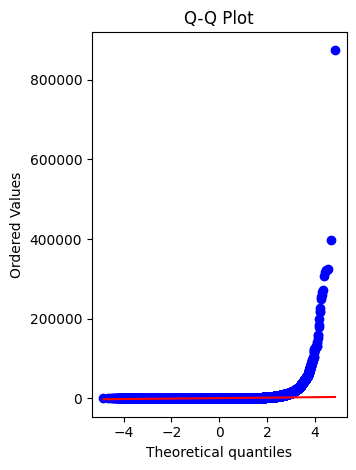

In [25]:
plt.subplot(1, 2, 2)
stats.probplot(mean_df['mean_tpm'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

If the p-value is greater than 0.05, the null hypothesis that the data is normally distributed cannot be rejected.

In [26]:
shapiro_test = stats.shapiro(mean_df['mean_tpm'])
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: Statistic=0.08567037656953236, p-value=9.555913965939835e-237


/Users/aleynakara/miniconda3/envs/ml4rg/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1122838.
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
ks_test = stats.kstest(mean_df['mean_tpm'], 'norm')
print(f"Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")

Kolmogorov-Smirnov Test: Statistic=0.8896377966099883, p-value=0.0


The use case of Z-score normalization is that when you need to standardize data for machine learning algorithms that assume the data is normally distributed. Since TPM values are not normally distributed, we can conclude that we do not use Z-score normalization.